In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn datasets has pre defined datasets
from sklearn.datasets import load_digits

In [5]:
load_digits

<function sklearn.datasets.base.load_digits(n_class=10, return_X_y=False)>

In [6]:
digits = load_digits()

In [7]:
#explore what digits contains
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [8]:
#numeric 8x8 data
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

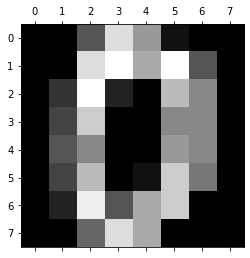

In [9]:
#actual image
plt.gray()
plt.matshow(digits.images[0])

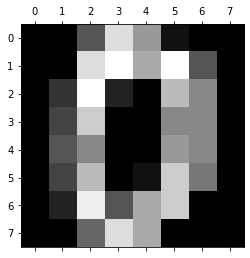

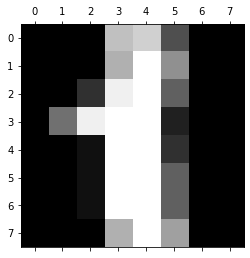

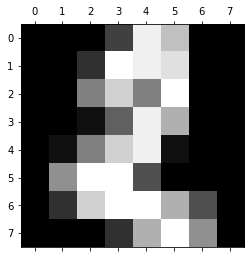

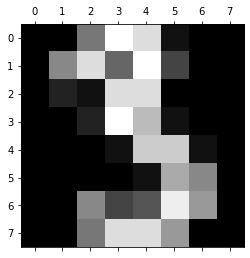

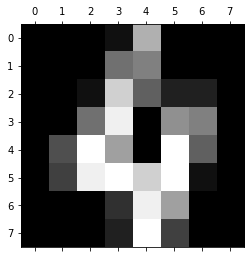

In [10]:
for i in range(5):
    plt.matshow(digits.images[i])
    

In [11]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [15]:
len(x_train)

1437

In [16]:
len(x_test)

360

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [18]:
model.fit(x_train,y_train)

C:\Users\Aquib\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aquib\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
model.score(x_test,y_test)

0.9583333333333334

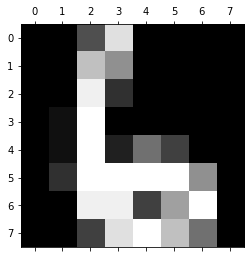

In [20]:
plt.matshow(digits.images[67])

In [21]:
digits.target[67]

6

In [22]:
#not providing images because images like binary data and model like numeric data so providing 
#data as the argument to predict
model.predict(digits.data[[67]])

array([6])

In [23]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [48]:
#checking where model failed
#one of the ways for doing so is using confusion matrix

In [24]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predicted)
cm


array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 28,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  1,  1,  1],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  3],
       [ 0,  1,  1,  1,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1, 36]], dtype=int64)

Text(69.0, 0.5, 'Truth')

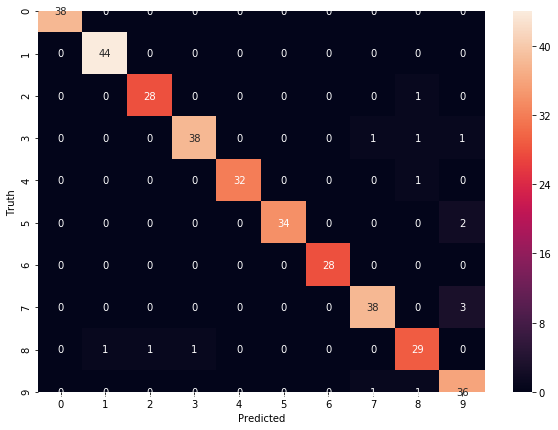

In [25]:
#confusion metrics visualiztaion
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# 1 time the model says predicted was 1 whereas truth was 8
# 3 instances said predicted was 9 wheras the truth was 7